In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization

import warnings # suppress warnings
warnings.filterwarnings("ignore") 

sns.set_style("darkgrid") # setting plot style

In [2]:
# Loading dataset
df = pd.read_csv('/content/drug200 (1).csv')

# Displaying first 5 rows
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
# Installing fasteda
! pip install fasteda


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4740 sha256=670ca5f29f95e76ce9efd03ec26d4d9ea0fb5e3c2adbac428130b334024bde0c
  Stored in directory: /root/.cache/pip/wheels/16/a1/29/b9136342bd9faa9ea32da6994469fd8d9f3f390057b939a6e3
Successfully built fasteda


DataFrame Head:


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


DataFrame Tail:


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(200, 6)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
Age,200,44.315,45,16.544,15,31,45,58,74,0.030081,-1.090780
Na_to_K,200,16.084,13.937,7.224,6.269,10.445,13.937,19.38,38.247,1.031530,0.340695


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



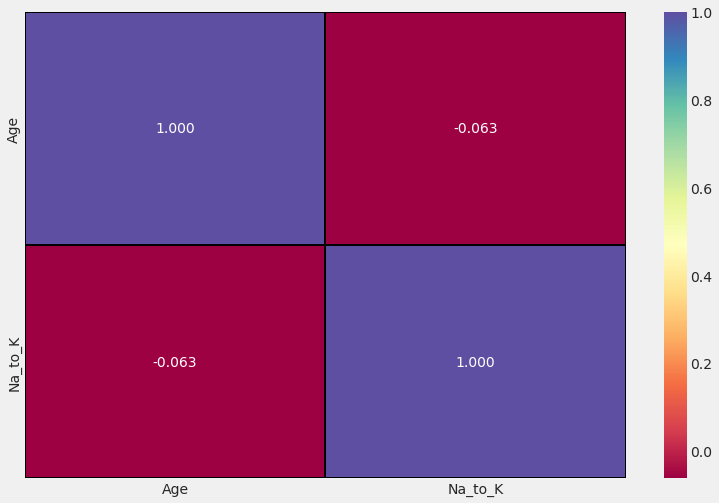

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



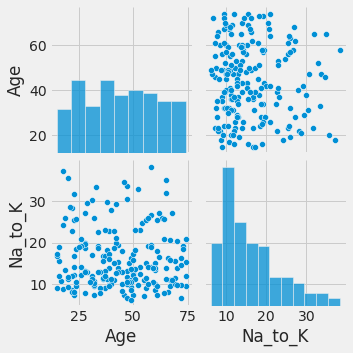

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



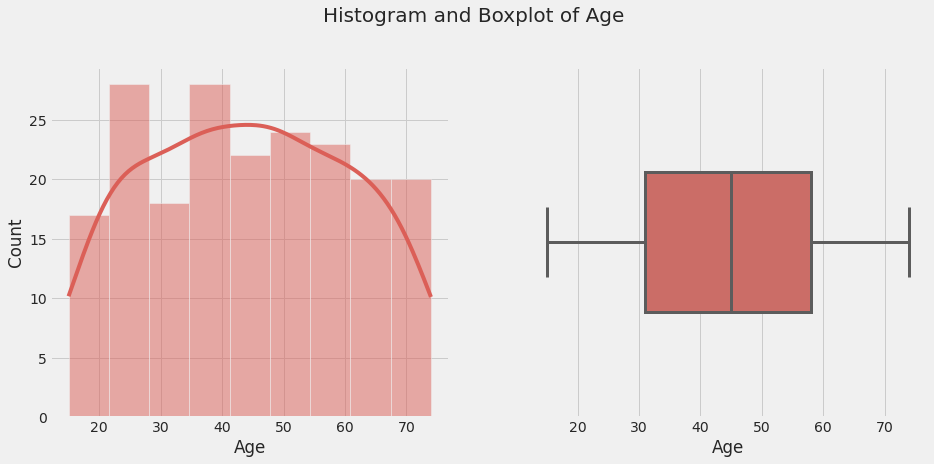

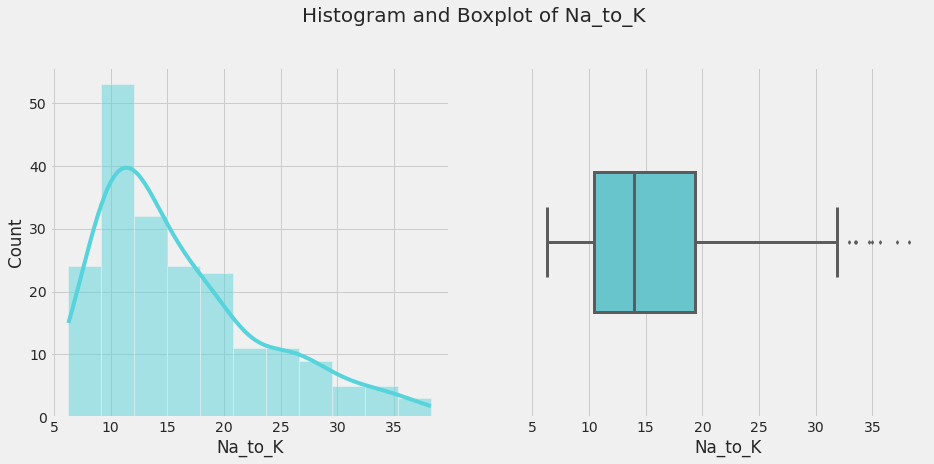

----------------------------------------------------------------------------------------------------
Countplot(s):



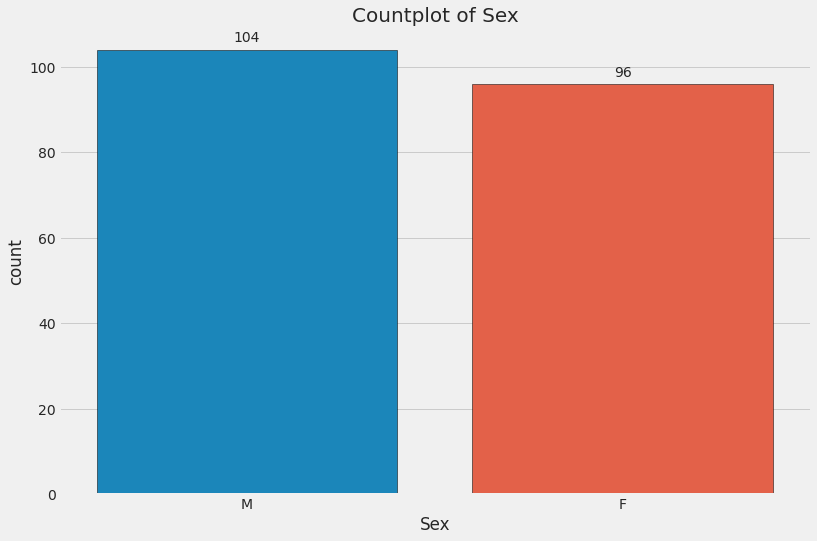

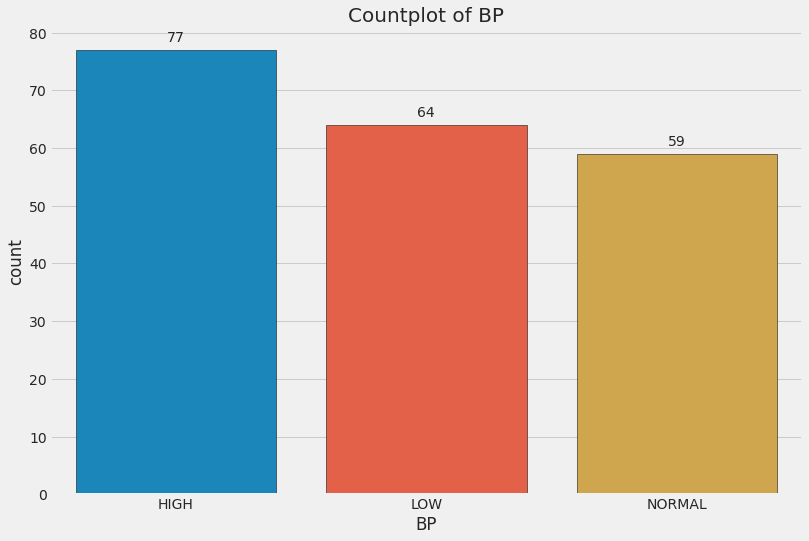

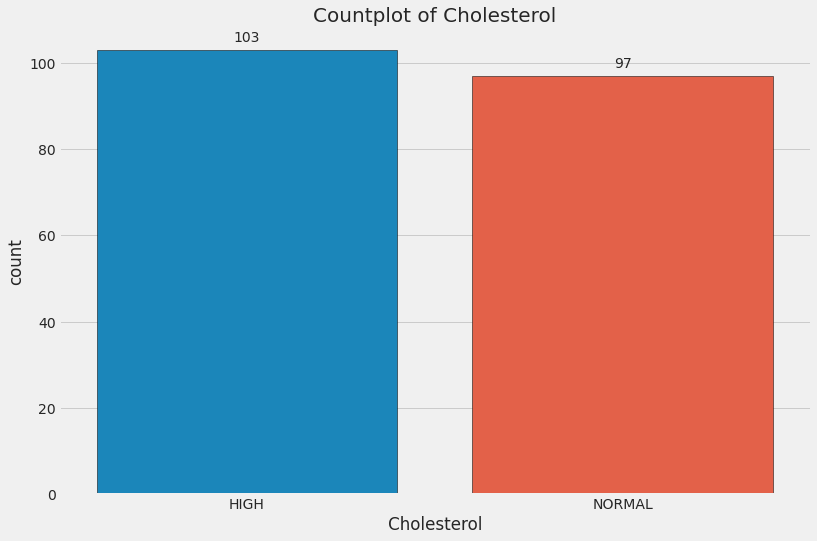

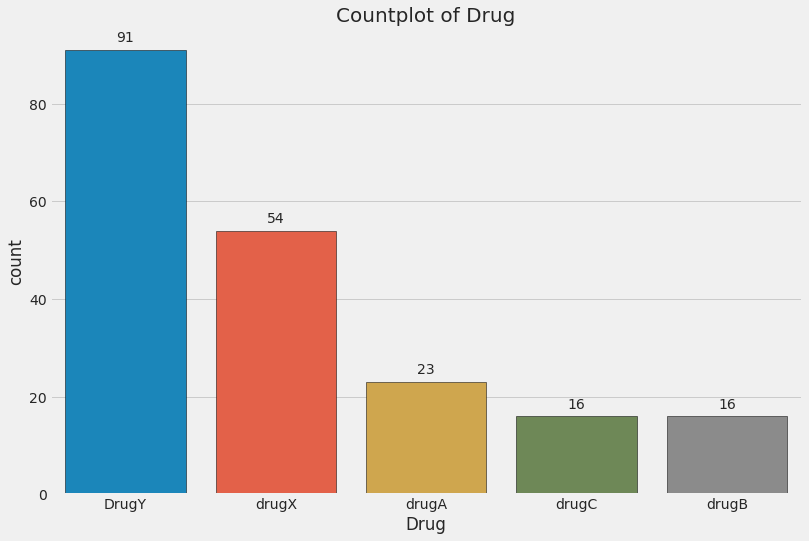

In [4]:
import fasteda

# Fast EDA
fasteda.fast_eda(df)

In [5]:
# Checking the number of identical records
df.duplicated().sum()

0

In [6]:
from sklearn.preprocessing import LabelEncoder

# Labeling target column
df["Drug"] = df[["Drug"]].apply(LabelEncoder().fit_transform)

# Displaying first 5 rows of data
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,0
1,47,M,LOW,HIGH,13.093,3
2,47,M,LOW,HIGH,10.114,3
3,28,F,NORMAL,HIGH,7.798,4
4,61,F,LOW,HIGH,18.043,0


In [7]:
# Chosing target feature
target = "Drug"

# Splitting data into X and y
X = df.drop(columns=[target])
y = df[target]

# Printing 5 rows of X
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11)

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import make_column_transformer

# Preprocessing features
preprocessor = make_column_transformer(
    (StandardScaler(), ["Age", "Na_to_K"]),
    (OneHotEncoder(), ["Sex", "BP", "Cholesterol"])
)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Displaying first 5 rows of preprocessed data
print("train shape:", X_train.shape, "test shape:", X_test.shape)

train shape: (180, 9) test shape: (20, 9)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import f1_score

models = [RandomForestClassifier(), 
          BalancedRandomForestClassifier()]

for model in models:
    # Fitting and predicting
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcualting f1 score
    f1score = f1_score(y_test, y_pred, average='weighted')
    print(model, "=", f1score)

RandomForestClassifier() = 1.0
BalancedRandomForestClassifier() = 0.906904761904762


In [12]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 15.6 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=a14c0741a3fa2240fae1c8ecc788917d8f89f9099ed47ebdbd9e52bb689b79cf
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [13]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=4, population_size=10, verbosity=2)
# Fitting and predicting
tpot.fit(X_train, y_train)
y_pred = tpot.predict(X_test)

# Calcualting f1 score
f1score = f1_score(y_test, y_pred, average='weighted')
print("\n",tpot, "=", f1score)

Optimization Progress:   0%|          | 0/50 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9944444444444445

Generation 2 - Current best internal CV score: 0.9944444444444445

Generation 3 - Current best internal CV score: 0.9944444444444445

Generation 4 - Current best internal CV score: 0.9944444444444445

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=16)

 TPOTClassifier(generations=4, population_size=10, verbosity=2) = 1.0
